In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
image = cv2.cvtColor(cv2.imread("1.png"), cv2.COLOR_BGR2RGB)
image.shape

(1080, 1920, 3)

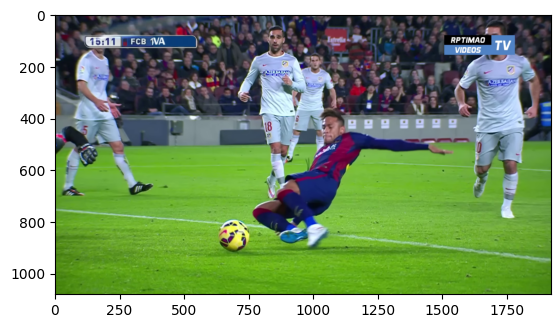

In [6]:
plt.figure()
plt.imshow(image)
plt.show()

In [7]:
def elbow_method(X, k_min=1, k_max=10):
    inertia = {}
    for k in range(k_min, k_max+1):
        print(k)
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia[k] = kmeans.inertia_

    plt.figure()
    plt.plot(inertia.keys(), inertia.values())
    plt.ylabel("Inertia")
    plt.xlabel("Number of clústers")
    plt.show()

    return inertia

1
2
3
4
5
6
7
8
9
10


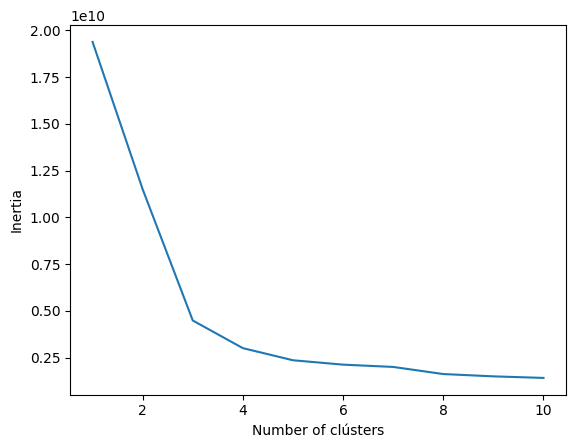

In [8]:
processed_image = image.reshape(-1, 3)
inertia = elbow_method(processed_image, k_min=1, k_max=10)

In [ ]:
# def silhouette_score_(X, k_min=2, k_max=10):
#     silhouette = {}
#     for k in range(k_min, k_max+1):
#         print(k)
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(X)
#         silhouette[k] = silhouette_score(X, kmeans.labels_)

#     plt.figure()
#     plt.plot(silhouette.keys(), silhouette.values())
#     plt.ylabel("silhouette")
#     plt.xlabel("Number of clústers")
#     plt.show()

#     return silhouette

In [ ]:
# silhouette = silhouette_score_(processed_image, k_min=3, k_max=4)
# np.argmax(silhouette)

## Probando con tres clusters como sugiere el método del codo

In [12]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
predicted_image = kmeans3.fit_predict(processed_image)
predicted_image.shape

(2073600,)

In [18]:
reshaped_predicted_image = predicted_image.reshape((1080, 1920))
centroids3 = kmeans3.cluster_centers_ / 255

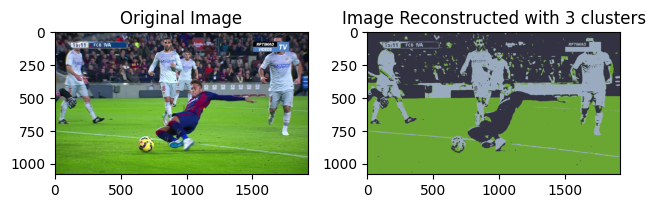

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image)
ax2.imshow(centroids3[reshaped_predicted_image])

ax1.set_title("Original Image")
ax2.set_title("Image Reconstructed with 3 clusters")

plt.tight_layout()
plt.show()

2
3
4
5
6
7
8
9
10


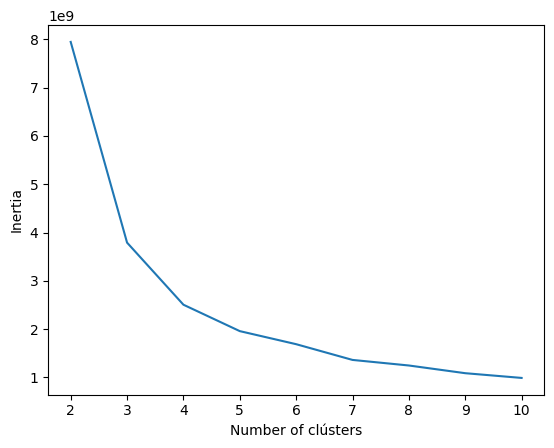

In [23]:
## Using a second image
image = cv2.imread("1004.jpg")
processed_image = image.reshape(-1, 3)
inertia = elbow_method(processed_image, k_min=2, k_max=10)

<Figure size 1000x800 with 0 Axes>

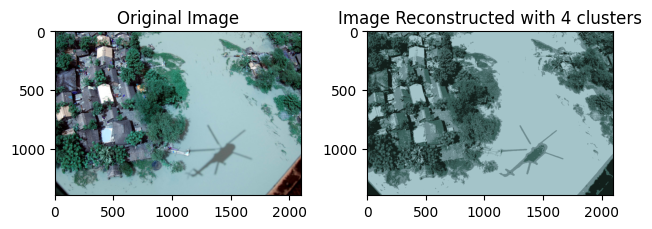

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
predicted_image = kmeans.fit_predict(processed_image)

reshaped_predicted_image = predicted_image.reshape((image.shape[0], image.shape[1]))
centroids4 = kmeans.cluster_centers_ / 255

plt.figure(figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image)
ax2.imshow(centroids4[reshaped_predicted_image])
ax1.set_title("Original Image")
ax2.set_title("Image Reconstructed with 4 clusters")
plt.tight_layout()
plt.show()